In [1]:
import keras
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,GlobalAveragePooling2D
from keras.layers.core import Activation
from keras.models import Model
from keras.models import load_model
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from IPython.display import Image
#from keras.preprocessing import image
#from keras.applications import imagenet_utils

Using TensorFlow backend.


In [94]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Conv2D, MaxPooling2D
import os
batch_size = 32
num_classes = 14
epochs = 10
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
# Разделяем данные на обучающий и тестовый наборы: 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape) 
print(x_train.shape[0], 'train samples') 
print(x_test.shape[0], 'test samples')
# Преобразование векторов классов в двоичные матрицы 
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


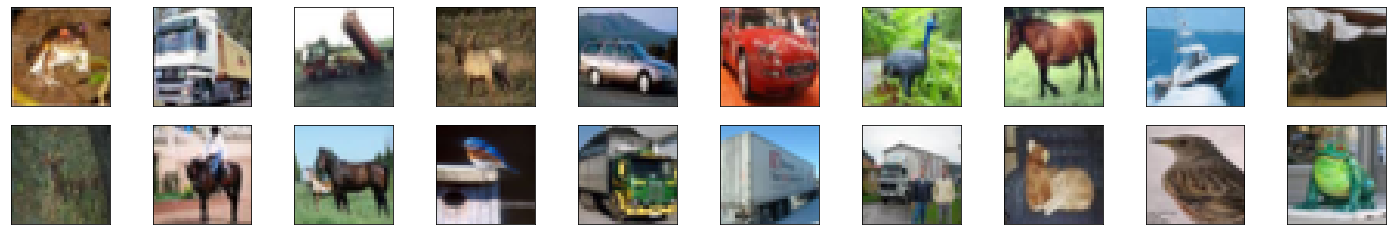

In [24]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(x_train[idx])

In [109]:
base_model=MobileNet(weights='imagenet',include_top=False)
output_model=base_model.output
output_model=GlobalAveragePooling2D()(output_model)
output_model=Dense(1024,activation='relu')(output_model)
output_model=Dense(512,activation='relu')(output_model)
output_model=Dense(14,activation='softmax')(output_model)
# последний слой с числом нейронов = числу классов
model=Model(inputs=base_model.input,outputs=output_model)

In [110]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same', input_shape=x_train.shape[1:])) 
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 
model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Activation('relu')) 
model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))
model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(num_classes)) 
model.add(Activation('softmax')) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)       

In [112]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
# Let's train the model using RMSprop 
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy']) 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [113]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 245s 5ms/step - loss: 1.8784 - accuracy: 0.3139 - val_loss: 1.5869 - val_accuracy: 0.4347
Epoch 2/10
50000/50000 [==============================] - 246s 5ms/step - loss: 1.5459 - accuracy: 0.4368 - val_loss: 1.4307 - val_accuracy: 0.4914
Epoch 3/10
50000/50000 [==============================] - 257s 5ms/step - loss: 1.3932 - accuracy: 0.4978 - val_loss: 1.2640 - val_accuracy: 0.5517
Epoch 4/10
50000/50000 [==============================] - 213s 4ms/step - loss: 1.2937 - accuracy: 0.5376 - val_loss: 1.1966 - val_accuracy: 0.5744
Epoch 5/10
50000/50000 [==============================] - 188s 4ms/step - loss: 1.2164 - accuracy: 0.5704 - val_loss: 1.1030 - val_accuracy: 0.6091
Epoch 6/10
50000/50000 [==============================] - 212s 4ms/step - loss: 1.1520 - accuracy: 0.5942 - val_loss: 1.0665 - val_accuracy: 0.6254
Epoch 7/10
50000/50000 [==============================] - 217s

In [114]:
model_name = 'keras_cifar10_trained_model1.h5'

In [115]:
if not os.path.isdir(save_dir): os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name) 
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /Users/M/Desktop/Нейронки/saved_models/keras_cifar10_trained_model1.h5 


In [116]:
scores = model.evaluate(x_test, y_test, verbose=1) 
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
epochs=epochs,

10000/10000 [==============================] - 6s 577us/step
Test loss: 0.9140359135627747
Test accuracy: 0.6789000034332275


In [117]:
scores = model.evaluate(x_train, y_train, verbose=1) 
print('Train loss:', scores[0])
print('Train accuracy:', scores[1])
epochs=epochs,

50000/50000 [==============================] - 31s 625us/step
Train loss: 0.8435779777526855
Train accuracy: 0.7083799839019775


In [128]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [150]:
print("Accuracy Score:" ,accuracy_score(y_test, keras.utils.to_categorical(np.argmax(model.predict(x_test), axis=1), num_classes)))

Accuracy Score: 0.6789


In [151]:
report = classification_report(y_test, keras.utils.to_categorical(np.argmax(model.predict(x_test), axis=1), num_classes), target_names=['1', '2','3','4','5','6','7','8','9','10','11','12','13','14'])
print(report)

              precision    recall  f1-score   support

           1       0.70      0.74      0.72      1000
           2       0.85      0.77      0.81      1000
           3       0.50      0.57      0.53      1000
           4       0.53      0.46      0.49      1000
           5       0.55      0.68      0.61      1000
           6       0.63      0.56      0.59      1000
           7       0.78      0.73      0.75      1000
           8       0.70      0.75      0.72      1000
           9       0.80      0.80      0.80      1000
          10       0.83      0.73      0.78      1000
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.68      0.68      0.68     10000
   macro avg       0.49      0.48      0.49     10000
weighted avg       0.69      0.68      0.68     10000
 samples avg       0.68   

/Users/M/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/M/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [152]:
from sklearn.metrics import confusion_matrix

In [169]:
keras.utils.to_categorical(np.argmax(model.predict(x_test), axis=1), num_classes)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [183]:
confusion_matrix(np.argmax(y_test,axis=1), np.argmax(model.predict(x_test), axis=1), labels=[0,1,2,3,4,5,6,7,8,9])

array([[737,  16,  82,   9,  31,   8,   9,  16,  71,  21],
       [ 45, 771,  13,  10,  11,   3,  11,  11,  35,  90],
       [ 62,   3, 573,  57, 144,  58,  48,  35,  16,   4],
       [ 16,   2, 126, 460, 107, 149,  58,  53,  20,   9],
       [ 21,   2,  84,  45, 681,  19,  37,  97,  13,   1],
       [ 13,   2, 107, 166,  65, 555,  19,  68,   3,   2],
       [  5,   3,  70,  58,  92,  25, 732,  10,   4,   1],
       [ 14,   1,  53,  31,  86,  57,   2, 750,   3,   3],
       [ 87,  27,  24,  13,  15,   5,   8,   3, 802,  16],
       [ 49,  82,  12,  18,  15,   7,  18,  34,  37, 728]])

In [184]:
report = classification_report(y_train, keras.utils.to_categorical(np.argmax(model.predict(x_train), axis=1), num_classes), target_names=['1', '2','3','4','5','6','7','8','9','10','11','12','13','14'])
print(report)

              precision    recall  f1-score   support

           1       0.74      0.75      0.75      5000
           2       0.86      0.81      0.83      5000
           3       0.54      0.62      0.58      5000
           4       0.58      0.51      0.54      5000
           5       0.57      0.72      0.64      5000
           6       0.67      0.58      0.62      5000
           7       0.80      0.74      0.77      5000
           8       0.72      0.77      0.74      5000
           9       0.82      0.83      0.82      5000
          10       0.85      0.76      0.80      5000
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       0.71      0.71      0.71     50000
   macro avg       0.51      0.51      0.51     50000
weighted avg       0.72      0.71      0.71     50000
 samples avg       0.71   

In [185]:
confusion_matrix(np.argmax(y_train,axis=1), np.argmax(model.predict(x_train), axis=1), labels=[0,1,2,3,4,5,6,7,8,9])

array([[3756,   74,  395,   52,  142,   28,   22,   72,  357,  102],
       [ 159, 4061,   64,   34,   56,   12,   49,   42,  162,  361],
       [ 259,   15, 3125,  237,  664,  223,  209,  174,   75,   19],
       [  88,   14,  571, 2558,  460,  705,  286,  213,   71,   34],
       [ 123,    5,  377,  169, 3612,  101,  145,  429,   31,    8],
       [  32,    6,  470,  778,  371, 2879,   94,  332,   22,   16],
       [  28,   20,  359,  292,  443,   84, 3685,   36,   33,   20],
       [  47,    8,  193,  176,  448,  218,   25, 3828,   29,   28],
       [ 346,  112,  135,   48,   58,   25,   25,   26, 4137,   88],
       [ 217,  415,   68,   86,   61,   24,   55,  154,  142, 3778]])

# CIFAR100

In [ ]:
cifar100 = keras.datasets.cifar100

In [61]:
(x1_train, y1_train), (x1_test, y1_test) = cifar100.load_data(label_mode='fine')

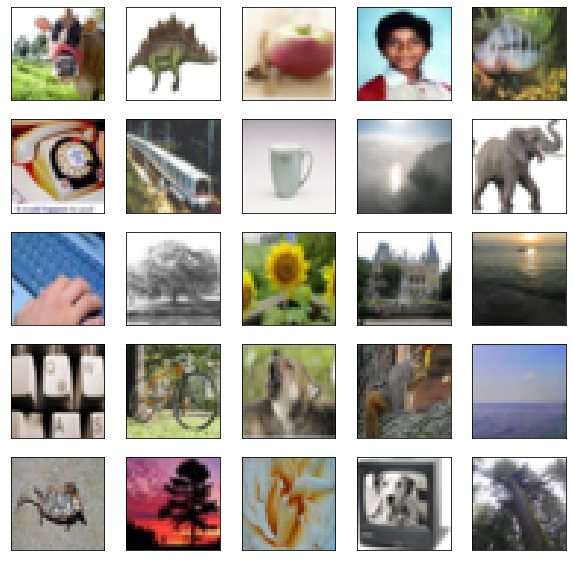

In [53]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x1_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
plt.show()

In [63]:
x1_train.shape

(50000, 32, 32, 3)

In [68]:
from tqdm import tqdm
x2_train=[]
y2_train=[]
for idx in tqdm(np.arange(50000)):
    if (y1_train[idx]==10)or(y1_train[idx]==11)or(y1_train[idx]==12)or(y1_train[idx]==13):
        x2_train.append(x1_train[idx])
        y2_train.append(y1_train[idx])

100%|██████████| 50000/50000 [00:00<00:00, 153518.63it/s]


In [102]:
x3_train=np.array(x2_train)
y3_train=np.array(y2_train)
y3_train = keras.utils.to_categorical(y3_train, num_classes) 

In [74]:
x2_test=[]
y2_test=[]
for idx in tqdm(np.arange(10000)):
    if (y1_test[idx]==10)or(y1_test[idx]==11)or(y1_test[idx]==12)or(y1_test[idx]==13):
        x2_test.append(x1_test[idx])
        y2_test.append(y1_test[idx])

100%|██████████| 10000/10000 [00:00<00:00, 133032.15it/s]


In [103]:
x3_test = np.array(x2_test)
y3_test = np.array(y2_test)
y3_test = keras.utils.to_categorical(y3_test, num_classes)

In [186]:
x4_train = np.concatenate((x_train,x3_train,),axis=0)
y4_train = np.concatenate((y_train,y3_train,),axis=0)
x4_test = np.concatenate((x_test,x3_test,),axis=0)
y4_test = np.concatenate((y_test,y3_test,),axis=0)

In [187]:
batch_size = 32
num_classes = 14
epochs = 10
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model2.h5'

Заморозим первые 5ть слоев обученной модели для ускорения обучения

In [188]:
for layer in model.layers[:5]:
    layer.trainable = False

In [189]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)       

/Users/M/opt/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [190]:
model.fit(x4_train, y4_train, batch_size=batch_size, epochs=epochs, validation_data=(x4_test, y4_test), shuffle=True)

Train on 52000 samples, validate on 10400 samples
Epoch 1/10
52000/52000 [==============================] - 215s 4ms/step - loss: 3.5425 - accuracy: 0.5847 - val_loss: 1.0222 - val_accuracy: 0.6413
Epoch 2/10
52000/52000 [==============================] - 223s 4ms/step - loss: 1.0754 - accuracy: 0.6440 - val_loss: 0.9206 - val_accuracy: 0.6737
Epoch 3/10
52000/52000 [==============================] - 214s 4ms/step - loss: 0.9883 - accuracy: 0.6637 - val_loss: 0.9165 - val_accuracy: 0.6790
Epoch 4/10
52000/52000 [==============================] - 203s 4ms/step - loss: 0.9459 - accuracy: 0.6758 - val_loss: 0.8609 - val_accuracy: 0.6970
Epoch 5/10
52000/52000 [==============================] - 217s 4ms/step - loss: 0.9207 - accuracy: 0.6852 - val_loss: 0.8264 - val_accuracy: 0.7077
Epoch 6/10
52000/52000 [==============================] - 206s 4ms/step - loss: 0.8928 - accuracy: 0.6934 - val_loss: 0.8359 - val_accuracy: 0.7082
Epoch 7/10
52000/52000 [==============================] - 191s

In [191]:
scores = model.evaluate(x4_test, y4_test, verbose=1) 
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
epochs=epochs,

10400/10400 [==============================] - 6s 615us/step
Test loss: 0.76889578635876
Test accuracy: 0.7276923060417175


In [192]:
scores = model.evaluate(x4_train, y4_train, verbose=1) 
print('Train loss:', scores[0])
print('Train accuracy:', scores[1])
epochs=epochs,

52000/52000 [==============================] - 31s 589us/step
Train loss: 0.677199490409631
Train accuracy: 0.765423059463501


In [193]:
report = classification_report(y4_test, keras.utils.to_categorical(np.argmax(model.predict(x4_test), axis=1), num_classes), target_names=['1', '2','3','4','5','6','7','8','9','10','11','12','13','14'])
print(report)

              precision    recall  f1-score   support

           1       0.77      0.76      0.76      1000
           2       0.83      0.87      0.85      1000
           3       0.60      0.60      0.60      1000
           4       0.53      0.56      0.55      1000
           5       0.74      0.61      0.67      1000
           6       0.56      0.70      0.62      1000
           7       0.80      0.79      0.80      1000
           8       0.80      0.77      0.78      1000
           9       0.87      0.82      0.84      1000
          10       0.85      0.80      0.82      1000
          11       0.71      0.71      0.71       100
          12       0.60      0.78      0.68       100
          13       0.75      0.83      0.79       100
          14       0.85      0.52      0.65       100

   micro avg       0.73      0.73      0.73     10400
   macro avg       0.73      0.72      0.72     10400
weighted avg       0.74      0.73      0.73     10400
 samples avg       0.73   

In [194]:
confusion_matrix(np.argmax(y4_test,axis=1), np.argmax(model.predict(x4_test), axis=1), labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])

array([[756,  26,  66,  21,   9,  12,   9,  12,  55,  34,   0,   0,   0,
          0],
       [ 12, 872,   6,  15,   1,   6,  10,   2,  15,  61,   0,   0,   0,
          0],
       [ 67,   8, 604,  68,  73,  80,  55,  31,   8,   6,   0,   0,   0,
          0],
       [ 12,   3,  77, 560,  32, 217,  60,  19,   9,  11,   0,   0,   0,
          0],
       [ 21,   5,  84,  79, 614,  76,  39,  70,  11,   1,   0,   0,   0,
          0],
       [  8,   3,  51, 160,  29, 701,   8,  37,   3,   0,   0,   0,   0,
          0],
       [  4,   5,  50,  70,  26,  40, 794,   7,   2,   2,   0,   0,   0,
          0],
       [ 13,   1,  46,  30,  38, 101,   3, 765,   1,   2,   0,   0,   0,
          0],
       [ 63,  41,  14,  21,   0,  10,   6,   2, 819,  24,   0,   0,   0,
          0],
       [ 26,  88,   9,  25,   4,  12,   9,   7,  21, 799,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  71,  27,   1,
          1],
       [  0,   0,   0,   0,   0,   0,   0, 

In [195]:
report = classification_report(y4_train, keras.utils.to_categorical(np.argmax(model.predict(x4_train), axis=1), num_classes), target_names=['1', '2','3','4','5','6','7','8','9','10','11','12','13','14'])
print(report)

              precision    recall  f1-score   support

           1       0.80      0.79      0.80      5000
           2       0.86      0.91      0.88      5000
           3       0.66      0.66      0.66      5000
           4       0.59      0.62      0.60      5000
           5       0.78      0.67      0.72      5000
           6       0.61      0.76      0.67      5000
           7       0.83      0.82      0.82      5000
           8       0.83      0.78      0.80      5000
           9       0.89      0.85      0.87      5000
          10       0.89      0.83      0.86      5000
          11       0.66      0.75      0.70       500
          12       0.64      0.80      0.71       500
          13       0.77      0.74      0.76       500
          14       0.80      0.51      0.63       500

   micro avg       0.77      0.77      0.77     52000
   macro avg       0.76      0.75      0.75     52000
weighted avg       0.77      0.77      0.77     52000
 samples avg       0.77   

In [196]:
confusion_matrix(np.argmax(y4_train,axis=1), np.argmax(model.predict(x4_train), axis=1), labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])

array([[3969,  119,  311,   85,   48,   38,   23,   51,  225,  131,    0,
           0,    0,    0],
       [  59, 4552,   34,   34,   10,   30,   16,   17,   53,  195,    0,
           0,    0,    0],
       [ 273,   16, 3300,  339,  304,  336,  254,  121,   41,   16,    0,
           0,    0,    0],
       [  66,   15,  284, 3083,  126, 1052,  225,   86,   42,   21,    0,
           0,    0,    0],
       [ 118,    8,  367,  312, 3336,  303,  192,  324,   29,   11,    0,
           0,    0,    0],
       [  19,    5,  174,  652,  141, 3775,   72,  140,   11,   11,    0,
           0,    0,    0],
       [  21,   28,  245,  311,  109,  157, 4088,   13,   14,   14,    0,
           0,    0,    0],
       [  34,   11,  153,  211,  184,  444,   14, 3910,   14,   25,    0,
           0,    0,    0],
       [ 263,  148,   88,   89,   17,   32,   24,   14, 4235,   90,    0,
           0,    0,    0],
       [ 119,  398,   31,   88,    4,   55,   24,   57,   73, 4151,    0,
           0,    